# Uploading AOIs to the Google bucket
Polygons could be given or manually drawn using http://geojson.io/, they could also be drawn using QGIS or an automatic script. If you draw them keep them small (250 x 250 km²)

In [9]:
# Necesary imports 
import os
from ml4floods.data import utils
import geopandas as gpd
import datetime

In [5]:
# Access parameters for the ML4CC bucket
key_json = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/ml4cc-general-access_request_pays.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_json

## Upload new AOIs to the Google bucket


In [6]:
# GeoJSON file containing the new polygons to be mapped
input_file = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/AOIs_new/2022-07-21_aois.geojson"
pols_new = gpd.read_file(input_file)
print(f"Loaded {pols_new.shape[0]} polygons.")
pols_new.head()

Loaded 45 polygons.


,name,geometry
0,AOI0289,"POLYGON ((147.49960 -32.44461, 147.70960 -32.4..."
1,AOI0299,"POLYGON ((147.49960 -30.44461, 147.70960 -30.4..."
2,AOI0316,"POLYGON ((147.69960 -32.44461, 147.90960 -32.4..."
3,AOI0317,"POLYGON ((147.69960 -32.24461, 147.90960 -32.2..."
4,AOI0342,"POLYGON ((147.89960 -32.64461, 148.10960 -32.6..."


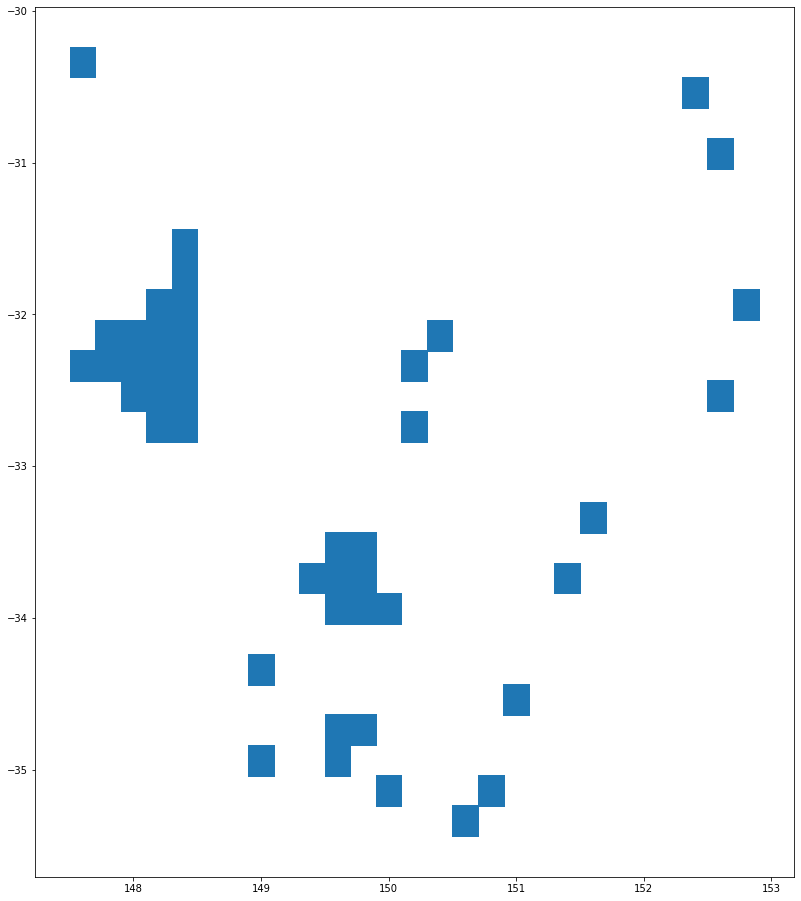

In [8]:
# Plot the new polygons
ax = pols_new.plot(figsize=(16, 16))

In [4]:
# Optional: Save to the GeoJSON to the bucket
#utils.write_geojson_to_gcp("gs://ml4cc_data_lake/0_DEV/1_Staging/operational/VAL001/aois.json", data)

In [11]:
# Details of the EMS activation and flood date start
ems_code = "EMSR586"
year = 2022
month = 6
day = 27

# Iterate through the AOIs, convert to pickles and upload
for row in pols_new.itertuples():
    aoi_code = row.name
    satellite_date = datetime.datetime(year, month, day)
    data_save = {'satellite date': satellite_date,
                 'area_of_interest_polygon': row.geometry,
                 'ems_code': ems_code,
                 'aoi_code': aoi_code,
                 'date_ems_code': satellite_date}
    gs_path = f"gs://ml4cc_data_lake/0_DEV/1_Staging/operational/{ems_code}/{aoi_code}/flood_meta/{satellite_date.strftime('%Y-%m-%d')}.pickle"
    utils.write_pickle_to_gcp(gs_path, data_save)
    print(f"Wrote {aoi_code} to GCP bucket")

Wrote AOI0289 to GCP bucket
Wrote AOI0299 to GCP bucket
Wrote AOI0316 to GCP bucket
Wrote AOI0317 to GCP bucket
Wrote AOI0342 to GCP bucket
Wrote AOI0343 to GCP bucket
Wrote AOI0344 to GCP bucket
Wrote AOI0368 to GCP bucket
Wrote AOI0369 to GCP bucket
Wrote AOI0370 to GCP bucket
Wrote AOI0371 to GCP bucket
Wrote AOI0372 to GCP bucket
Wrote AOI0395 to GCP bucket
Wrote AOI0396 to GCP bucket
Wrote AOI0397 to GCP bucket
Wrote AOI0398 to GCP bucket
Wrote AOI0399 to GCP bucket
Wrote AOI0400 to GCP bucket
Wrote AOI0401 to GCP bucket
Wrote AOI0465 to GCP bucket
Wrote AOI0468 to GCP bucket
Wrote AOI0525 to GCP bucket
Wrote AOI0546 to GCP bucket
Wrote AOI0547 to GCP bucket
Wrote AOI0551 to GCP bucket
Wrote AOI0552 to GCP bucket
Wrote AOI0553 to GCP bucket
Wrote AOI0574 to GCP bucket
Wrote AOI0578 to GCP bucket
Wrote AOI0579 to GCP bucket
Wrote AOI0580 to GCP bucket
Wrote AOI0599 to GCP bucket
Wrote AOI0605 to GCP bucket
Wrote AOI0638 to GCP bucket
Wrote AOI0640 to GCP bucket
Wrote AOI0668 to GCP

## Update existing AOIs with new dates

In [12]:
# GeoJSON file containing the EXISTING polygons
input_file = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/AOIs_existing/2022-07-21_aois.geojson"
pols_existing = gpd.read_file(input_file)
print(f"Loaded {pols_existing.shape[0]} polygons.")
pols_existing.head()

Loaded 218 polygons.


,aoi_code,geometry
0,AOI01,"POLYGON ((147.09960 -31.24462, 147.30960 -31.2..."
1,AOI02,"POLYGON ((147.09960 -31.04462, 147.30960 -31.0..."
2,AOI03,"POLYGON ((147.09960 -30.84462, 147.30960 -30.8..."
3,AOI04,"POLYGON ((147.09960 -30.64462, 147.30960 -30.6..."
4,AOI05,"POLYGON ((147.09960 -30.44462, 147.30960 -30.4..."


<AxesSubplot:>

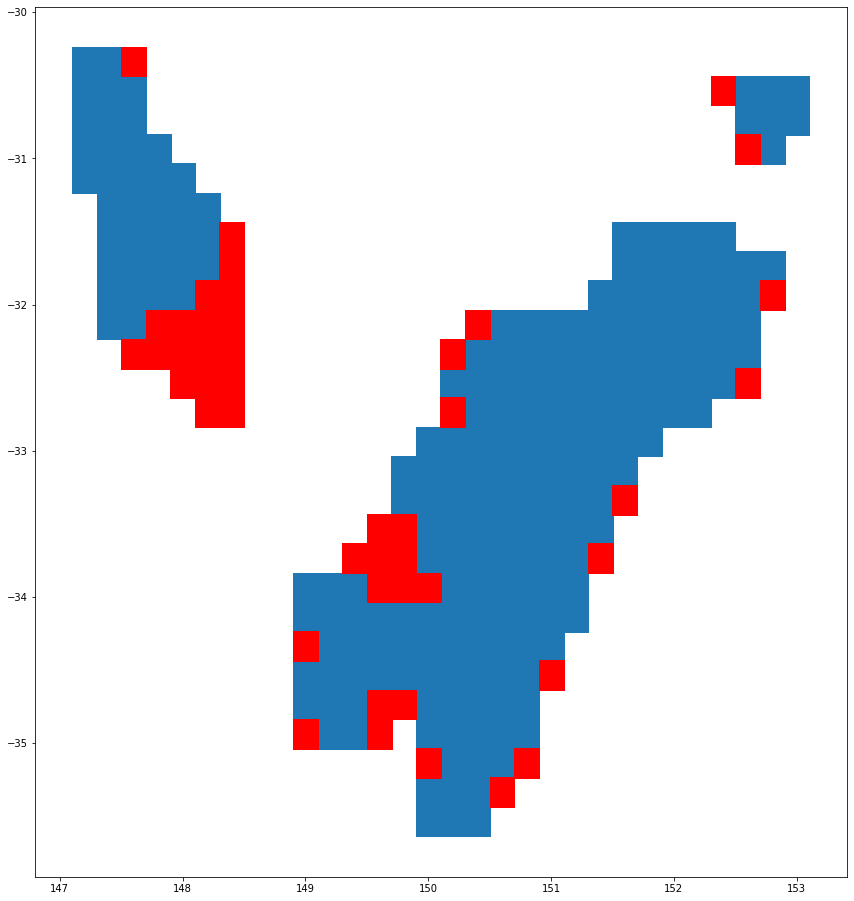

In [14]:
# Plot the new polygons
ax = pols_existing.plot(figsize=(16, 16))
pols_new.plot(ax=ax, facecolor='red')

In [16]:
# Details of the EMS activation and flood date start
ems_code = "EMSR586"
year = 2022
month = 6
day = 27

# Iterate through the AOIs, convert to pickles and upload
for row in pols_existing.itertuples():
    aoi_code = row.aoi_code/home/cpurcell/Documents/2
    satellite_date = datetime.datetime(year, month, day)
    data_save = {'satellite date': satellite_date,
                 'area_of_interest_polygon': row.geometry,
                 'ems_code': ems_code,
                 'aoi_code': aoi_code,
                 'date_ems_code': satellite_date}
    gs_path = f"gs://ml4cc_data_lake/0_DEV/1_Staging/operational/{ems_code}/{aoi_code}/flood_meta/{satellite_date.strftime('%Y-%m-%d')}.pickle"
    utils.write_pickle_to_gcp(gs_path, data_save)
    print(f"Wrote {aoi_code} to GCP bucket")

Wrote AOI01 to GCP bucket
Wrote AOI02 to GCP bucket
Wrote AOI03 to GCP bucket
Wrote AOI04 to GCP bucket
Wrote AOI05 to GCP bucket
Wrote AOI06 to GCP bucket
Wrote AOI07 to GCP bucket
Wrote AOI08 to GCP bucket
Wrote AOI09 to GCP bucket
Wrote AOI10 to GCP bucket
Wrote AOI100 to GCP bucket
Wrote AOI101 to GCP bucket
Wrote AOI102 to GCP bucket
Wrote AOI103 to GCP bucket
Wrote AOI104 to GCP bucket
Wrote AOI105 to GCP bucket
Wrote AOI106 to GCP bucket
Wrote AOI107 to GCP bucket
Wrote AOI108 to GCP bucket
Wrote AOI109 to GCP bucket
Wrote AOI11 to GCP bucket
Wrote AOI110 to GCP bucket
Wrote AOI111 to GCP bucket
Wrote AOI112 to GCP bucket
Wrote AOI113 to GCP bucket
Wrote AOI114 to GCP bucket
Wrote AOI115 to GCP bucket
Wrote AOI116 to GCP bucket
Wrote AOI117 to GCP bucket
Wrote AOI118 to GCP bucket
Wrote AOI119 to GCP bucket
Wrote AOI12 to GCP bucket
Wrote AOI120 to GCP bucket
Wrote AOI121 to GCP bucket
Wrote AOI122 to GCP bucket
Wrote AOI123 to GCP bucket
Wrote AOI124 to GCP bucket
Wrote AOI125 